### **Negative sentences in reviews**

In [1]:
%%capture
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import unicodedata
import fasttext
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from wordcloud import WordCloud

In [3]:
# Created from sentences_classification.ipynb
df_negative_sentences = pd.read_csv('../data/processed/negative_sentences.csv')

In [4]:
tfile = open('negative_sentences.txt', 'a')
tfile.write(df_negative_sentences['text_processed'].to_string())
tfile.close()

In [5]:
model = fasttext.train_unsupervised('negative_sentences.txt')

Read 0M words
Number of words:  3853
Number of labels: 0
Progress: 100.0% words/sec/thread:   69802 lr:  0.000000 avg.loss:  2.657419 ETA:   0h 0m 0s


In [6]:
df_negative_sentences['vec'] = df_negative_sentences['text_processed'].apply(lambda x: model.get_sentence_vector(str(x)))

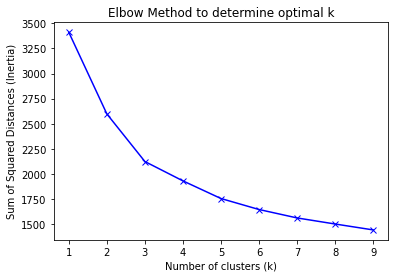

In [32]:
sum_squared_distances = []

K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_negative_sentences['vec'].values.tolist())
    sum_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method to determine optimal k')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3)

In [34]:
df_negative_sentences['cluster'] = kmeans.fit_predict(df_negative_sentences['vec'].values.tolist())

In [9]:
def generate_wordcloud(df):
    text = ' '.join([str(i) for i in df['text_processed']])
    wordcloud = WordCloud(max_words=100, background_color='Black').generate(text)
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

##### **Cluster 0**

In [36]:
cluster_0 = df_negative_sentences[df_negative_sentences['cluster']==0].drop(columns=['Unnamed: 0', 'label', 'text'])

In [37]:
cluster_0.sample(5)

review_index                                     text_processed  \
26373       4_1373  faltan detalles habitacion ser notable espejo ...   
11201       1_1606  habitacion grande destartalada absurdos mueble...   
16593        2_911  sofacama salon no pudimos utilizar abrimos ver...   
1734         1_285  ka ventana ventilar encontramos jardinera ka u...   
19926        3_930  aunque pedi habitacion cuarto bano interior do...   

                                                     vec  cluster         x  \
26373  [-0.008358348, 0.008775948, 0.013275874, -0.07...        0 -0.101315   
11201  [0.02834042, -0.023313574, 0.023788583, -0.044...        0 -0.063123   
16593  [0.0005128163, -0.016651817, 0.051642917, -0.0...        0  0.207263   
1734   [-0.01465519, 0.019150382, 0.04565526, -0.0493...        0  0.079756   
19926  [-0.010799401, 0.009448024, 0.009811686, -0.06...        0  0.061834   

              y         z  
26373  0.083430 -0.127718  
11201  0.270937  0.065278  
16593  0.250011 -0.033397  
1734   0.189039  0.044749  
19926  0.146384  0.007737

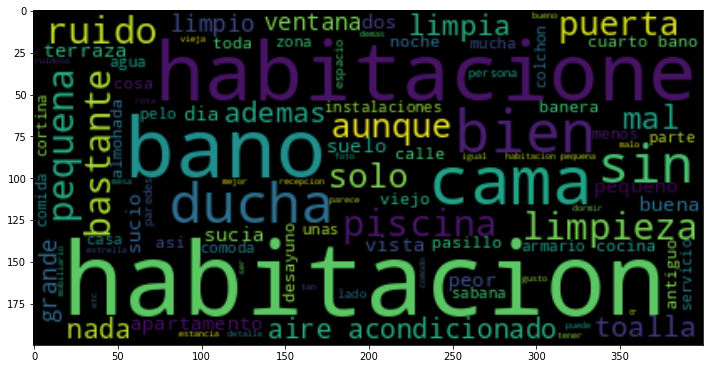

In [38]:
generate_wordcloud(cluster_0)

In [39]:
df_negative_sentences.loc[df_negative_sentences['cluster']==0, 'cluster'] = 'cleanliness and comfort'

In [41]:
n_sentences_c0 = len(cluster_0)
n_sentences = len(df_negative_sentences)
n_comments_c0 = cluster_0['review_index'].nunique()
n_comments = df_negative_sentences['review_index'].nunique()
perc_sentences_c0 = round(100*(n_sentences_c0/n_sentences))
perc_comments_c0 = round(100*(n_comments_c0/n_comments))

In [42]:
print(f'Total number of sentences (all clusters): {n_sentences}')
print(f'Number of sentences belonging to cluster 0: {n_sentences_c0}')
print(f'Percentage of sentences belonging to cluster 0: {perc_sentences_c0}')
print(f'Total number of comments: {n_comments}')
print(f'Number of comments that include sentences belonging to cluster 0: {n_comments_c0}')
print(f'Percentage of comments that include sentences belonging to cluster 0: {perc_comments_c0}')

Total number of sentences (all clusters): 30630
Number of sentences belonging to cluster 0: 8373
Percentage of sentences belonging to cluster 0: 27
Total number of comments: 7705
Number of comments that include sentences belonging to cluster 0: 4425
Percentage of comments that include sentences belonging to cluster 0: 57


##### **Cluster 1**

In [43]:
cluster_1 = df_negative_sentences[df_negative_sentences['cluster']==1].drop(columns=['Unnamed: 0', 'label', 'text'])

In [49]:
cluster_1.sample(5)

review_index                                     text_processed  \
23985       3_2130                                      bueno regular   
7465        1_1130  falta buena inversion quedado antiguo instalac...   
8913        1_1343                  trato empleados bueno menos duena   
16048        2_825  unico podriamos destacar hostal ubicacion aten...   
13753        2_396                                   mala experiencia   

                                                     vec cluster         x  \
23985  [-0.038919024, 0.085608944, -0.014963412, -0.0...       1 -0.308625   
7465   [-0.025538944, 0.03836211, -0.029080749, -0.08...       1 -0.245374   
8913   [-0.017949577, 0.06565675, 0.0441668, -0.04597...       1 -0.149732   
16048  [-0.049328916, 0.0862186, -0.017997887, -0.086...       1 -0.253927   
13753  [-0.058899026, 0.09638611, -0.016507184, -0.13...       1 -0.151415   

              y         z  
23985 -0.176558 -0.049492  
7465   0.033866 -0.014768  
8913  -0.097842  0.015968  
16048 -0.238594 -0.040645  
13753 -0.145630 -0.130652

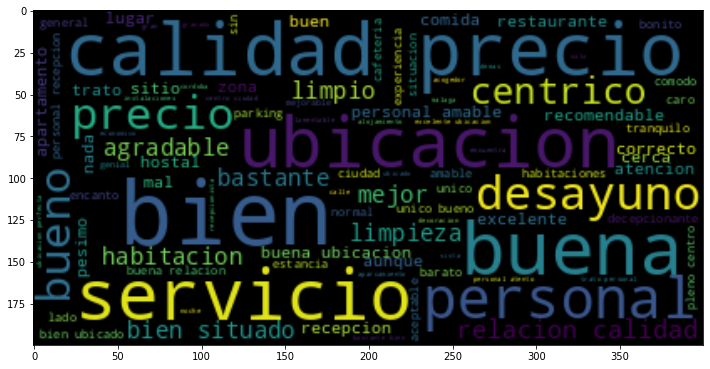

In [45]:
generate_wordcloud(cluster_1)

In [51]:
df_negative_sentences.loc[df_negative_sentences['cluster']==1, 'cluster'] = 'location, service and price'

In [52]:
n_sentences_c1 = len(cluster_1)
n_comments_c1 = cluster_1['review_index'].nunique()
perc_sentences_c1 = round(100*(n_sentences_c1/n_sentences))
perc_comments_c1 = round(100*(n_comments_c1/n_comments))

In [53]:
print(f'Total number of sentences (all clusters): {n_sentences}')
print(f'Number of sentences belonging to cluster 1: {n_sentences_c1}')
print(f'Percentage of sentences belonging to cluster 1: {perc_sentences_c1}')
print(f'Total number of comments: {n_comments}')
print(f'Number of comments that include sentences belonging to cluster 1: {n_comments_c1}')
print(f'Percentage of comments that include sentences belonging to cluster 1: {perc_comments_c1}')

Total number of sentences (all clusters): 30630
Number of sentences belonging to cluster 1: 7559
Percentage of sentences belonging to cluster 1: 25
Total number of comments: 7705
Number of comments that include sentences belonging to cluster 1: 4929
Percentage of comments that include sentences belonging to cluster 1: 64


##### **Cluster 2**

In [54]:
cluster_2 = df_negative_sentences[df_negative_sentences['cluster']==2].drop(columns=['Unnamed: 0', 'label', 'text'])

In [56]:
cluster_2.sample(5)

review_index                                     text_processed  \
7406        1_1123  llegaron quejarse aspiradora piscina sitio sac...   
27889       4_2567                       aloje semana establecimiento   
25113        4_522   alli hice amigos termine viajando pasando noches   
10389       1_1509  comento varios clientes hacer denuncia junta a...   
303           1_51                      respuesta no podia hacer nada   

                                                     vec cluster         x  \
7406   [-0.026829801, 0.026019488, 0.03392942, -0.063...       2  0.123914   
27889  [-0.06516336, 0.11320643, 0.021277945, -0.0095...       2  0.325984   
25113  [-0.0488052, 0.07857642, 0.028759353, 0.020640...       2  0.474415   
10389  [-0.058053218, 0.06550696, 0.018188082, -0.060...       2  0.094888   
303    [-0.06906774, 0.064256586, 0.04557308, -0.1066...       2  0.203533   

              y         z  
7406   0.088257 -0.035439  
27889 -0.284921  0.061992  
25113 -0.160867  0.131879  
10389 -0.096283 -0.071253  
303   -0.125234 -0.181651

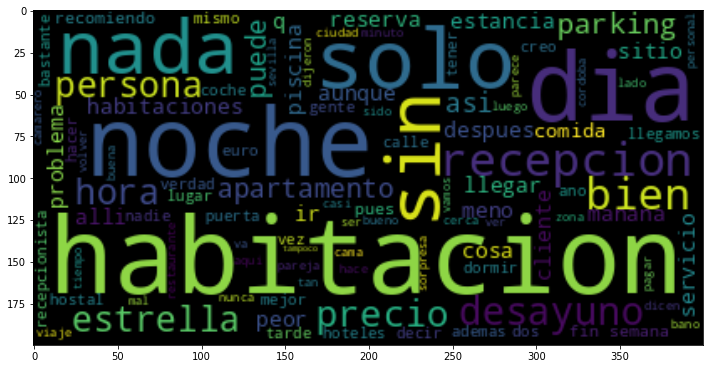

In [57]:
generate_wordcloud(cluster_2)

In [58]:
df_negative_sentences.loc[df_negative_sentences['cluster']==2, 'cluster'] = 'overall experience'

In [59]:
n_sentences_c2 = len(cluster_2)
n_comments_c2 = cluster_2['review_index'].nunique()
perc_sentences_c2 = round(100*(n_sentences_c2/n_sentences))
perc_comments_c2 = round(100*(n_comments_c2/n_comments))

In [60]:
print(f'Total number of sentences (all clusters): {n_sentences}')
print(f'Number of sentences belonging to cluster 2: {n_sentences_c2}')
print(f'Percentage of sentences belonging to cluster 2: {perc_sentences_c2}')
print(f'Total number of comments: {n_comments}')
print(f'Number of comments that include sentences belonging to cluster 2: {n_comments_c2}')
print(f'Percentage of comments that include sentences belonging to cluster 2: {perc_comments_c2}')

Total number of sentences (all clusters): 30630
Number of sentences belonging to cluster 2: 14698
Percentage of sentences belonging to cluster 2: 48
Total number of comments: 7705
Number of comments that include sentences belonging to cluster 2: 5358
Percentage of comments that include sentences belonging to cluster 2: 70


##### **Save csv**

In [61]:
df_negative_sentences.to_csv('../data/processed/negative_sentences_clusters.csv')

In [3]:
# Read csv
df_negative_sentences = pd.read_csv('../data/processed/negative_sentences_clusters.csv')

##### **Comments and sentences distribution**

In [4]:
clusters = list(df_negative_sentences['cluster'].unique())
n_comments = []
for cluster in clusters:
    n_comm = df_negative_sentences[df_negative_sentences['cluster']==cluster]['review_index'].nunique()
    n_comments.append(n_comm)

In [5]:
df_clusters = pd.DataFrame({'cluster':clusters, 'n_comments':n_comments})

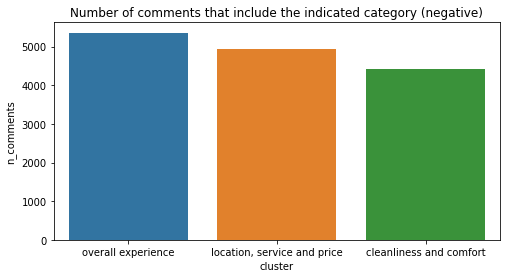

In [9]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_clusters, x='cluster', y='n_comments', order=df_clusters.sort_values('n_comments', ascending=False).cluster)
plt.title('Number of comments that include the indicated category (negative)')
plt.show()

##### **Clusters visualization**

In [64]:
# Main components to make 3D plot
pca = PCA(n_components=3)
df_negative_sentences['x'] = pca.fit_transform(df_negative_sentences['vec'].values.tolist())[:,0]
df_negative_sentences['y'] = pca.fit_transform(df_negative_sentences['vec'].values.tolist())[:,1]
df_negative_sentences['z'] = pca.fit_transform(df_negative_sentences['vec'].values.tolist())[:,2]

In [65]:
df_negative_sentences['cluster'] = df_negative_sentences['cluster'].astype('category')

In [66]:
fig = px.scatter_3d(df_negative_sentences, x='x', y='y', z='z', color='cluster')
fig.update_traces(marker_size = 2)
fig.show()

Reference:
https://towardsdatascience.com/making-sense-of-text-clustering-ca649c190b20#:~:text=For%20a%20refresh%2C%20clustering%20is,learn%20the%20pattern%20by%20itself.